<a href="https://colab.research.google.com/github/Jeevan008/Travel-Domain-Airline-Project/blob/main/Travel_Domain_Project_G1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Packages

In [103]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
#To display all the columns
pd.set_option('display.max_columns', None)

#Importing Dataset

In [6]:
df=pd.read_excel('airline_dataset.xlsx')

In [7]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [10]:
df.isnull().sum()/len(df)*100

,0
Airline,0.000000
Date_of_Journey,0.000000
Source,0.000000
Destination,0.000000
Route,0.009361
Dep_Time,0.000000
Arrival_Time,0.000000
Duration,0.000000
Total_Stops,0.009361
Additional_Info,0.000000


In [11]:
df.shape

(10683, 11)

In [12]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum()/len(df)*100

,0
Airline,0.0
Date_of_Journey,0.0
Source,0.0
Destination,0.0
Route,0.0
Dep_Time,0.0
Arrival_Time,0.0
Duration,0.0
Total_Stops,0.0
Additional_Info,0.0


In [14]:
df['Airline'].value_counts()

,count
Airline,
Jet Airways,3849
IndiGo,2053
Air India,1751
Multiple carriers,1196
SpiceJet,818
Vistara,479
Air Asia,319
GoAir,194
Multiple carriers Premium economy,13


In [15]:
df['journey_day'] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.day

In [18]:
df['journey_month'] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.month

In [20]:
df['journey_year'] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.year

In [22]:
df.drop(['Date_of_Journey','journey_year'], axis=1, inplace=True)

In [24]:
df['dep_hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['dep_min'] = pd.to_datetime(df['Dep_Time']).dt.minute

In [26]:
df.drop(['Dep_Time'], axis =1,inplace=True)

In [28]:
df['arr_hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df['arr_min'] = pd.to_datetime(df['Arrival_Time']).dt.minute

In [30]:
df.drop(['Arrival_Time'], axis=1, inplace=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Duration         10682 non-null  object
 5   Total_Stops      10682 non-null  object
 6   Additional_Info  10682 non-null  object
 7   Price            10682 non-null  int64 
 8   journey_day      10682 non-null  int32 
 9   journey_month    10682 non-null  int32 
 10  dep_hour         10682 non-null  int32 
 11  dep_min          10682 non-null  int32 
 12  arr_hour         10682 non-null  int32 
 13  arr_min          10682 non-null  int32 
dtypes: int32(6), int64(1), object(7)
memory usage: 1.2+ MB


In [34]:
duration=list(df['Duration'])

for i in range(len(duration)):
  if len(duration[i].split()) != 2:
    if 'h' in duration[i]:
      duration[i] = duration[i].strip()+ " 0m"
    else:
      duration[i] = "0h " + duration[i]

duration_hours = []
duration_mins = []
for i in range(len(duration)):
  duration_hours.append(int(duration[i].split(sep ="h")[0]))
  duration_mins.append(int(duration[i].split(sep ="m")[0].split()[-1]))


In [35]:
df['duration_hour'] = duration_hours
df['duration_min'] = duration_mins

In [37]:
df.drop(['Duration'], axis=1, inplace=True)

In [38]:
df.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min,arr_hour,arr_min,duration_hour,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Total_Stops      10682 non-null  object
 5   Additional_Info  10682 non-null  object
 6   Price            10682 non-null  int64 
 7   journey_day      10682 non-null  int32 
 8   journey_month    10682 non-null  int32 
 9   dep_hour         10682 non-null  int32 
 10  dep_min          10682 non-null  int32 
 11  arr_hour         10682 non-null  int32 
 12  arr_min          10682 non-null  int32 
 13  duration_hour    10682 non-null  int64 
 14  duration_min     10682 non-null  int64 
dtypes: int32(6), int64(3), object(6)
memory usage: 1.3+ MB


In [40]:
df['Additional_Info'].value_counts()

,count
Additional_Info,
No info,8344
In-flight meal not included,1982
No check-in baggage included,320
1 Long layover,19
Change airports,7
Business class,4
No Info,3
1 Short layover,1
Red-eye flight,1


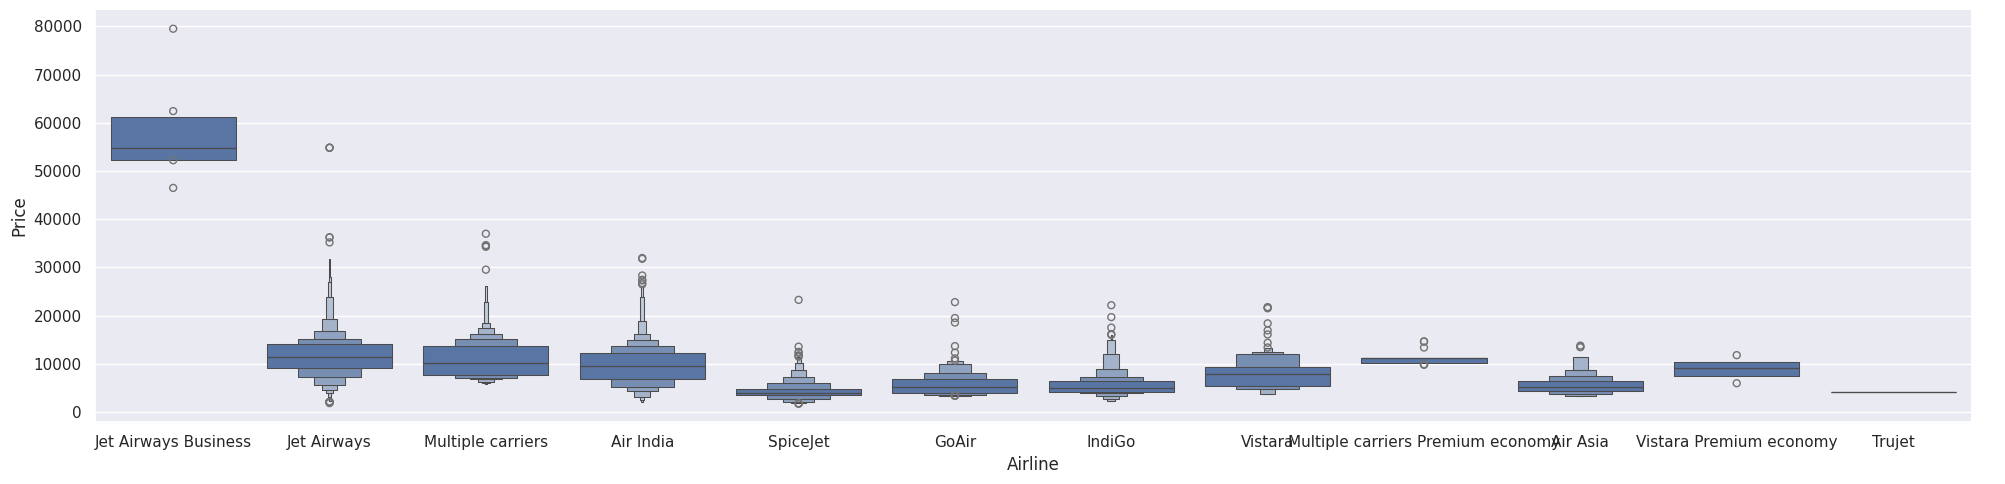

In [41]:
sns.catplot(y='Price',x='Airline', data = df.sort_values('Price', ascending=False),kind= 'boxen',aspect=4)
plt.show()

In [53]:
Airline1 = df[['Airline']]
Airline1 = pd.get_dummies(Airline1, drop_first=True, dtype='int64')
Airline1.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [54]:
df['Source'].value_counts()

,count
Source,
Delhi,4536
Kolkata,2871
Banglore,2197
Mumbai,697
Chennai,381


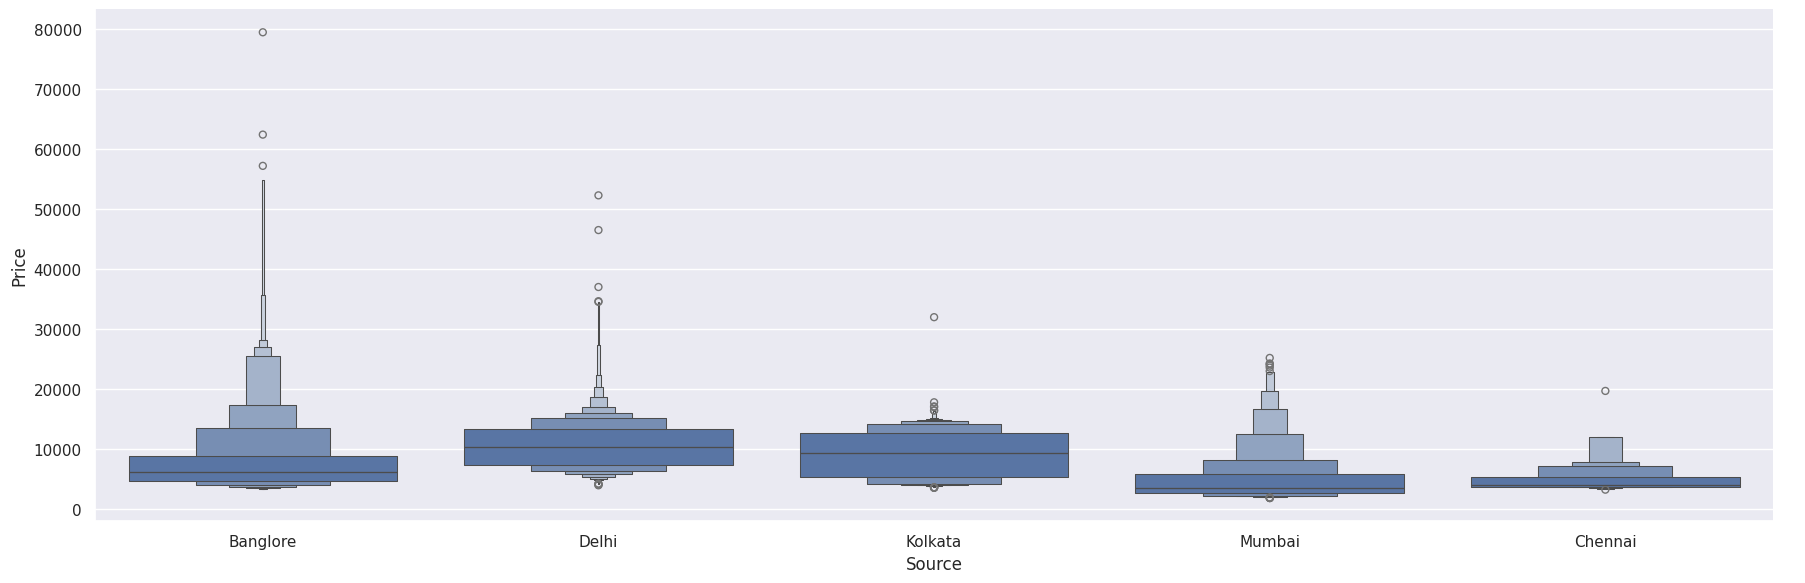

In [55]:
sns.catplot(y='Price', x='Source', data=df.sort_values('Price', ascending=False), kind='boxen', height=6, aspect=3)
plt.show()

In [59]:
Source1 =df[['Source']]
Source1=pd.get_dummies(Source1, drop_first=True, dtype = 'int64')
Source1.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [60]:
df['Destination'].value_counts()

,count
Destination,
Cochin,4536
Banglore,2871
Delhi,1265
New Delhi,932
Hyderabad,697
Kolkata,381


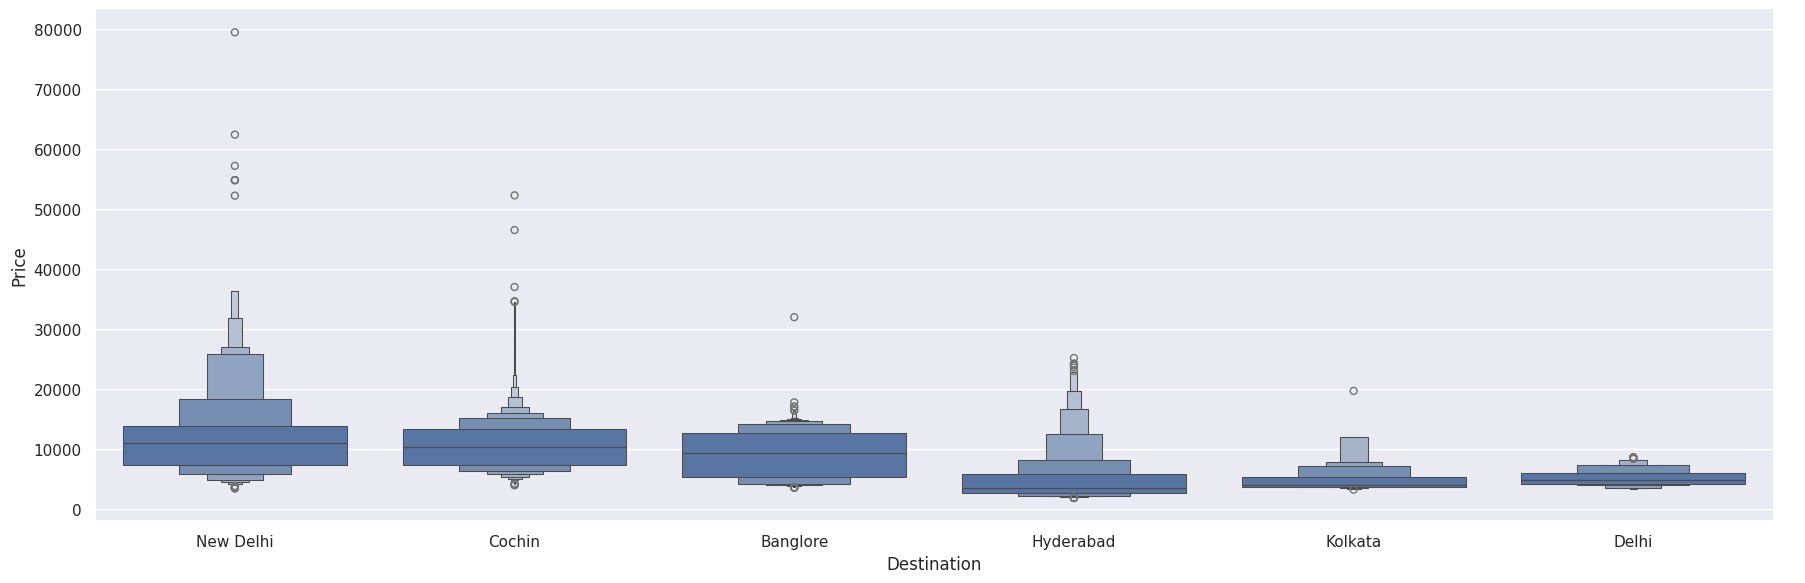

In [61]:
sns.catplot(y='Price', x='Destination', data=df.sort_values('Price', ascending=False), kind='boxen', height=6, aspect=3)
plt.show()

In [70]:
df['Destination'] = np.where(df['Destination']=='New Delhi', 'Delhi', df['Destination'])

In [78]:
Destination1 =df[['Destination']]
Destination1=pd.get_dummies(Destination1, drop_first=True, dtype = 'int64')
Destination1.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,1,0,0
1,0,0,0,0
2,1,0,0,0
3,0,0,0,0
4,0,1,0,0


In [79]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min,arr_hour,arr_min,duration_hour,duration_min
0,IndiGo,Banglore,Delhi,BLR → DEL,0,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1,No info,13302,1,3,16,50,21,35,4,45


In [73]:
df['Route'].value_counts()

,count
Route,
DEL → BOM → COK,2376
BLR → DEL,1552
CCU → BOM → BLR,979
CCU → BLR,724
BOM → HYD,621
...,...
BOM → VNS → DEL → HYD,1
BLR → HBX → BOM → NAG → DEL,1
BLR → BOM → IXC → DEL,1


In [74]:
df['Total_Stops'].value_counts()

,count
Total_Stops,
1,5625
0,3491
2,1520
3,45
4,1


In [75]:
df.replace({"non-stop":0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4}, inplace=True)

In [76]:
df['Total_Stops'].value_counts()

,count
Total_Stops,
1,5625
0,3491
2,1520
3,45
4,1


In [80]:
df.drop(['Route'], axis=1, inplace=True)

In [81]:
df['Additional_Info'].value_counts()

,count
Additional_Info,
No info,8344
In-flight meal not included,1982
No check-in baggage included,320
1 Long layover,19
Change airports,7
Business class,4
No Info,3
1 Short layover,1
Red-eye flight,1


In [83]:
df.drop(['Additional_Info'], axis=1, inplace=True)

In [84]:
df_final = pd.concat([df, Airline1, Source1, Destination1], axis=1)

In [85]:
df_final.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_min,arr_hour,arr_min,duration_hour,duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,IndiGo,Banglore,Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,IndiGo,Banglore,Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [86]:
df_final.drop(['Airline', 'Source', 'Destination'], axis=1, inplace=True)

In [87]:
df_final.head()

,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_min,arr_hour,arr_min,duration_hour,duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


#Split the data into dependent and Independent variable

In [88]:
x=df_final.drop(['Price'], axis=1)
y=df_final['Price']

In [89]:
x.head()

,Total_Stops,journey_day,journey_month,dep_hour,dep_min,arr_hour,arr_min,duration_hour,duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [90]:
y.head()

,Price
0,3897
1,7662
2,13882
3,6218
4,13302


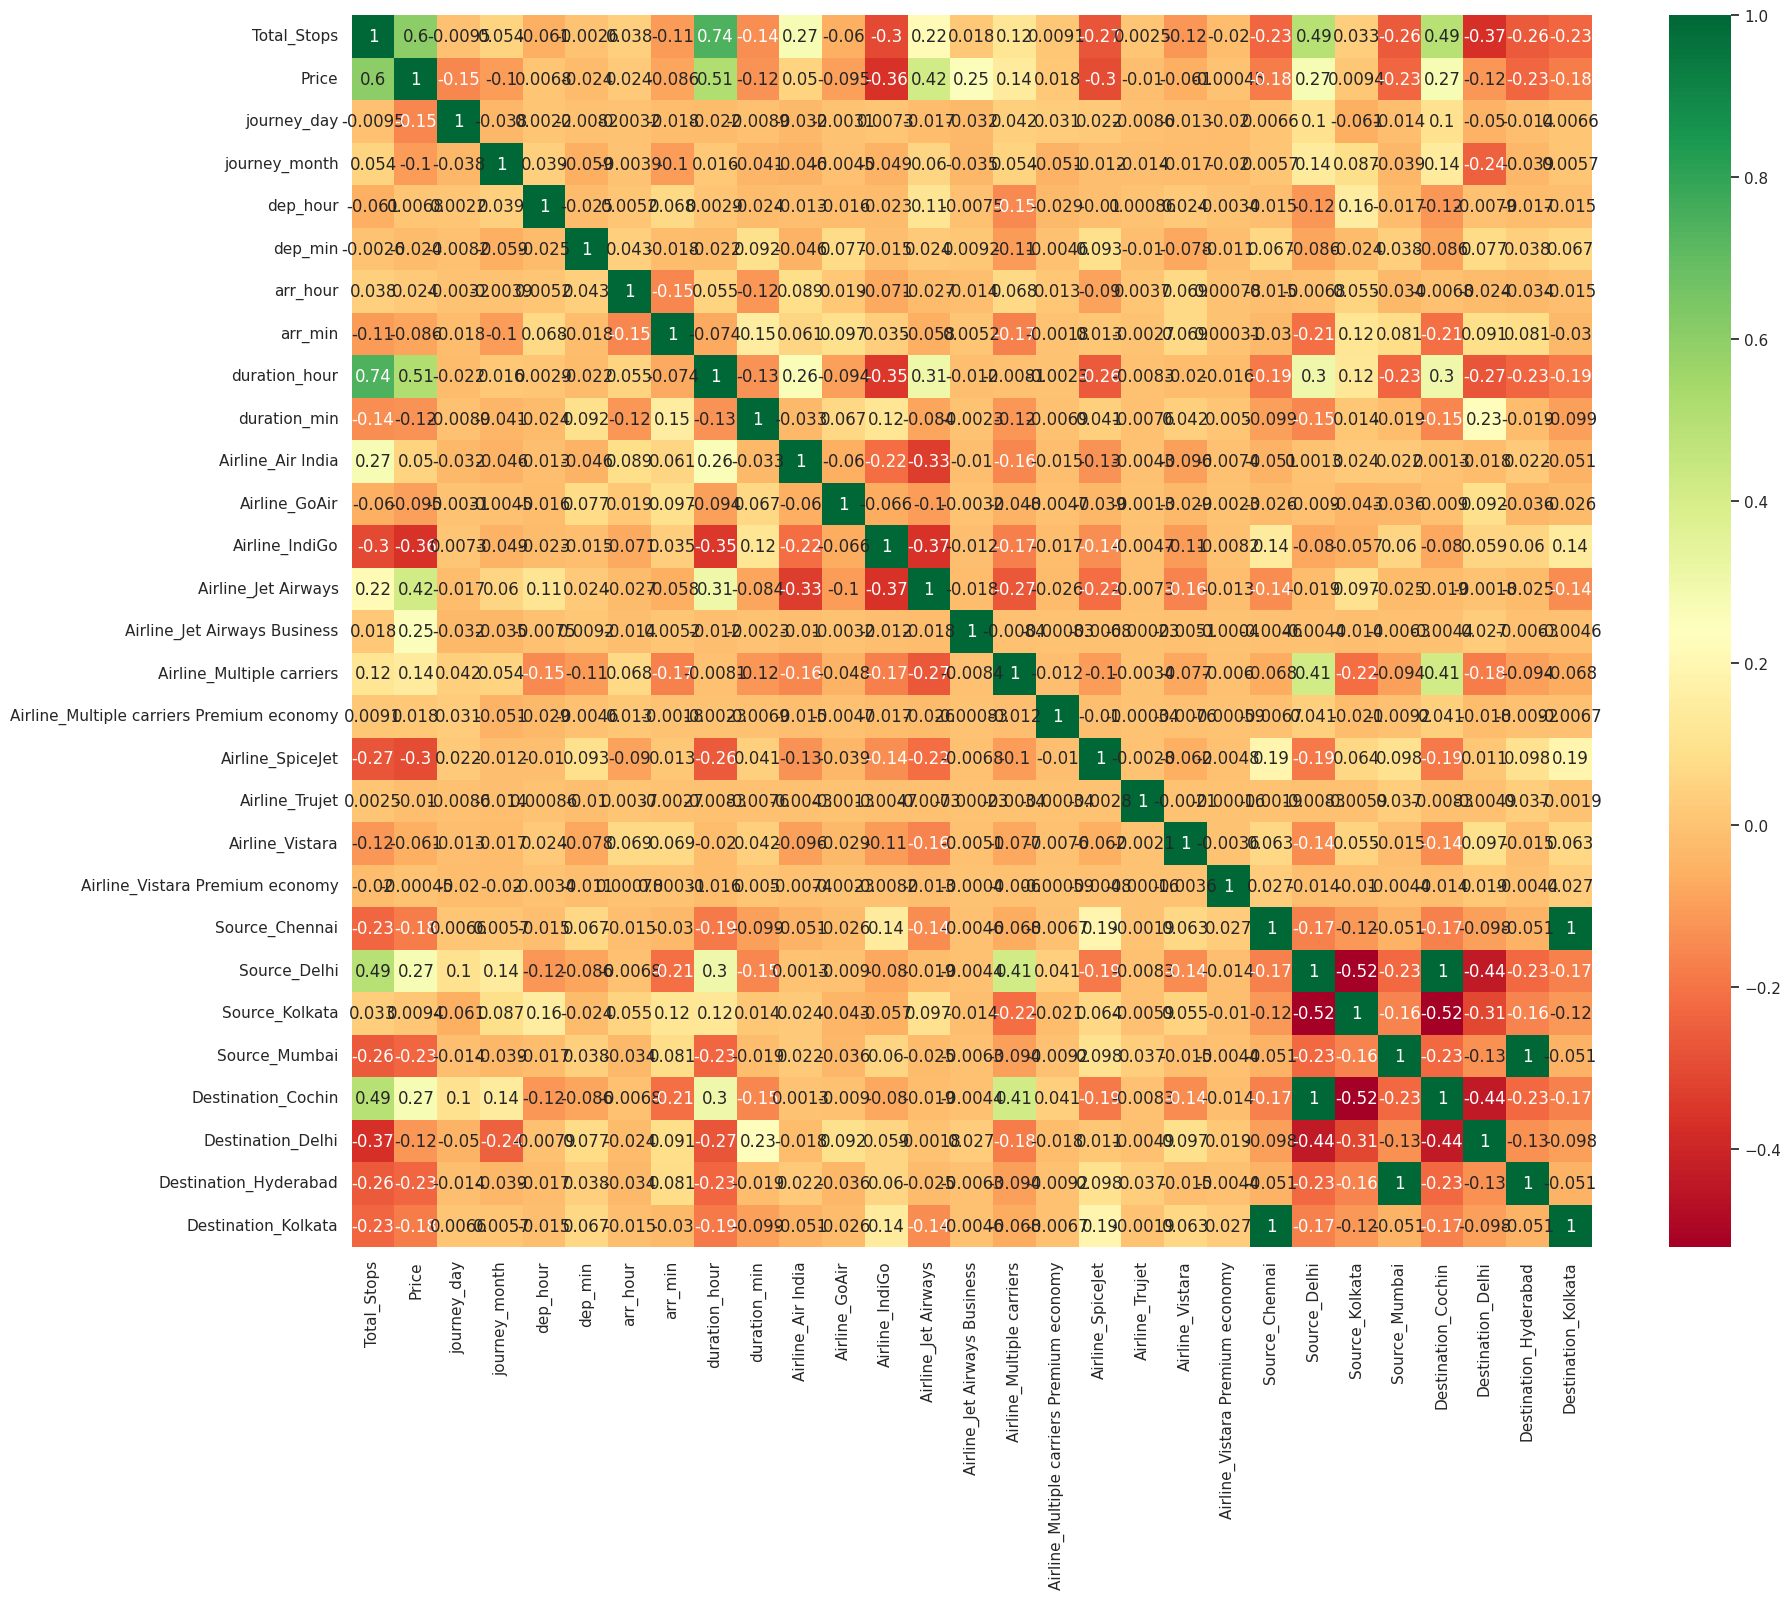

In [92]:
plt.figure(figsize=(20,16))
sns.heatmap(df_final.corr(),annot=True, cmap="RdYlGn")
plt.show()

To check which variable is more significant to impact price -- Feature Importance.

In [94]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x,y)

ExtraTreesRegressor()

In [95]:
selection.feature_importances_

array([2.23095676e-01, 1.41509077e-01, 5.93181114e-02, 2.41651731e-02,
       2.13325111e-02, 2.81552477e-02, 1.91745490e-02, 1.33624037e-01,
       1.84024990e-02, 9.13441616e-03, 1.91111622e-03, 1.86544011e-02,
       1.38814786e-01, 6.73700285e-02, 1.91331589e-02, 8.17020448e-04,
       5.70086816e-03, 1.10051717e-04, 4.56105802e-03, 5.72544020e-05,
       6.31730756e-04, 7.53861610e-03, 4.83723907e-03, 7.79194215e-03,
       1.38410766e-02, 1.95381829e-02, 1.00554761e-02, 7.24695418e-04])

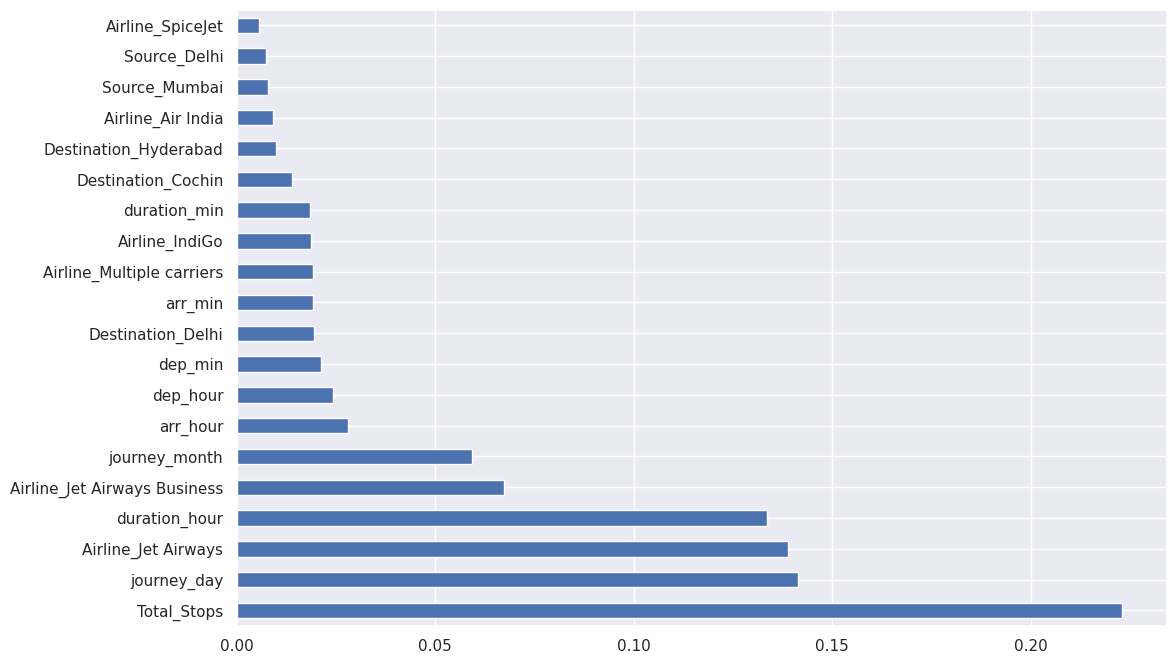

In [97]:
plt.figure(figsize=(12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

Building Model - Random Forest Model

In [98]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [99]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(x_train, y_train)

RandomForestRegressor()

In [100]:
y_pred_train = regressor.predict(x_train)
y_pred_test = regressor.predict(x_test)

In [101]:
regressor.score(x_train, y_train)

0.9541737340115929

In [102]:
regressor.score(x_test, y_test)

0.7922512480408077

In [104]:
from sklearn import metrics

In [106]:
print('MAE:',metrics.mean_absolute_error(y_test, y_pred_test))
print('MSE:',metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

MAE: 1189.810744912694
MSE: 4479490.291018421
RMSE: 2116.4806379975275


In [107]:
metrics.r2_score(y_test, y_pred_test)

0.7922512480408077

In [108]:
#RMSE / (max(y) - min(y))
2116.48 / (max(y) - min(y))

0.0272205574061451

#HyperParameter Tuning

In [117]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


param_distributions = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [120]:
random_search = RandomizedSearchCV(
    estimator=regressor,
    param_distributions=param_distributions,
    n_iter=10,  # Number of combinations to try
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42,
    scoring='neg_mean_squared_error'  # Or use 'r2' for R^2 score
)

In [121]:
random_search.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 500]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [122]:
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(x_test)
mse = mean_squared_error(y_test, y_pred)

print("Best Parameters:", random_search.best_params_)
print("Test MSE:", mse)

Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
Test MSE: 3965940.475182506


In [123]:
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

RMSE: 2116.4806379975275


In [124]:
import pickle

In [125]:
file = open('price_prediction.pkl', 'wb')
pickle.dump(random_search, file)

In [126]:
model = open('price_prediction.pkl','rb')
rforest = pickle.load(model)

In [127]:
y_prediction = rforest.predict(x_test)

In [128]:
y_prediction

array([16472.23738889,  5511.13466006,  8573.81811905, ...,
        6617.06507071, 12605.67074603, 12657.74139484])

In [129]:
metrics.r2_score(y_test, y_prediction)

0.8160685411651396